# Gamma regression for blood clotting

As a preliminary example of this package's functionality, we provide an example of performing a Gamma regression, which is used when the response variable is continuous and positive. We have adapted the following canonical example of a Gamma regression from McCullagh & Nelder (1989). 

Nine different percentage concentrations with prothrombin-free plasma ($u$) and clotting was induced via two lots of thromboplastin. Previous researchers had fitted a hyperbolic model, using an inverse transformation of the data for both lots $1$ and $2$, but we will analyze both lots using the inverse link and Gamma family. 

The following initial plots hint at using a log scale for $u$ to achieve inverse linearity, as well as the fact that the two lots have different regression and intercept coefficients. 

In [1]:
from scikit_stan import GLM

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('axes.spines', top=True, bottom=True, left=True, right=True)
#mpl.rc('axes', facecolor='white')
mpl.rc("xtick", bottom=True, labelbottom=True)
mpl.rc("ytick", left=True, labelleft=True)
mpl.style.use('ggplot')


# center images
from IPython.core.display import HTML
HTML("""
<style>
.jp-RenderedImage, .output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
# ATTRIBUTION: McCullagh & Nelder (1989), chapter 8.4.2 p 301-302
bcdata_dict = {
    "u": np.array([5, 10, 15, 20, 30, 40, 60, 80, 100]),
    "lot1": np.array([118, 58, 42, 35, 27, 25, 21, 19, 18]),
    "lot2": np.array([69, 35, 26, 21, 18, 16, 13, 12, 12]),
}
bc_data_X = np.log(bcdata_dict["u"])
bc_data_lot1 = bcdata_dict["lot1"]
bc_data_lot2 = bcdata_dict["lot2"]

/opt/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/traitlets/traitlets.py:3278: FutureWarning: --rc={'figure.dpi': 96} for dict-traits is deprecated in traitlets 5.0. You can pass --rc <key=value> ... multiple times to add items to a dict.
  warn(


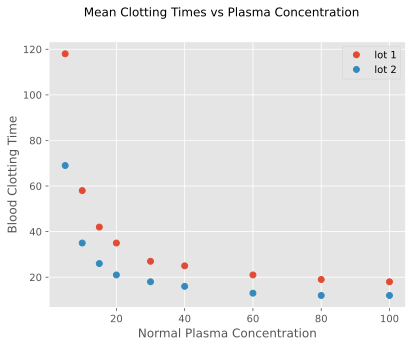

In [4]:
l1, = plt.plot(bcdata_dict["u"], bcdata_dict["lot1"], "o", label="lot 1")
l2, = plt.plot(bcdata_dict["u"], bcdata_dict["lot2"], "o", label="lot 2")

plt.suptitle("Mean Clotting Times vs Plasma Concentration")
plt.xlabel('Normal Plasma Concentration')
plt.ylabel('Blood Clotting Time')

plt.legend(handles=[l1, l2])

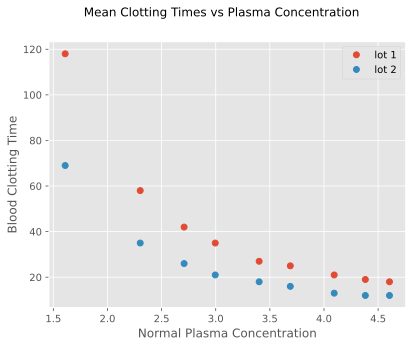

In [5]:
l1, = plt.plot(bc_data_X, bc_data_lot1, "o", label="lot 1")
l2, = plt.plot(bc_data_X, bc_data_lot2, "o", label="lot 2")

plt.suptitle("Mean Clotting Times vs Plasma Concentration")
plt.xlabel('Normal Plasma Concentration')
plt.ylabel('Blood Clotting Time')

plt.legend(handles=[l1, l2])

After this preliminary data analysis, we fit two lines to the two lots of data. Using $x = \log u$, we fit a GLM to the data.

The original results were as follows, and we recreate regression coefficients within a standard deviation of these values: 

$$\text{lot 1:} \quad  \hat{\mu} ^{-1} = - 0.01655(\pm 0.00086) + 0.01534(\pm 0.00143)x $$
$$\text{lot 2:} \quad  \hat{\mu} ^{-1} = - 0.02391(\pm 0.00038) + 0.02360(\pm 0.00062)x $$

As in previous work, we will fit two different linear models for each lot in the dataset. As usual, the $\alpha$ parameter is the regression intercept and $\mathbf{\beta}$ is vector of regression coefficients and the parameter $\sigma$ represents an auxiliary variable for the model. In this case, $\sigma$ is the shape parameter for the Gamma distribution. 

In [6]:
# Initialize two different GLM objects, one for each lot. 
glm_gamma1 = GLM(family="gamma", link="inverse", seed=1234)
glm_gamma2 = GLM(family="gamma", link="inverse", seed=1234)

# Fit the model. Note that default priors are used without autoscaling, see the 
# API to see how to change these.
glm_gamma1.fit(bc_data_X, bc_data_lot1, show_console=False)
glm_gamma2.fit(bc_data_X, bc_data_lot2, show_console=False)

print(glm_gamma1.alpha_, glm_gamma1.beta_)
print(glm_gamma2.alpha_, glm_gamma2.beta_)

/opt/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/scikit_stan/utils/validation.py:263: UserWarning: Passed data is one-dimensional, while estimator expects it to be at at least two-dimensional.
  warnings.warn(
/opt/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/scikit_stan/generalized_linear_regression/glm.py:476: UserWarning: Prior on intercept not specified. Using default prior.
                alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)
  warnings.warn(
/opt/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/scikit_stan/generalized_linear_regression/glm.py:522: UserWarning: Prior on auxiliary parameter not specified. Using default unscaled prior
                        sigma ~ exponential(1)
                    
  warnings.warn(
15:07:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:07:33 - cmdstanpy - INFO - CmdStan done processing.


15:07:34 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 12 divergent transitions (1.2%)
	Chain 2 had 20 divergent transitions (2.0%)
	Chain 3 had 38 divergent transitions (3.8%)
	Chain 4 had 27 divergent transitions (2.7%)
	Use function "diagnose()" to see further information.


15:07:34 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:07:34 - cmdstanpy - INFO - CmdStan done processing.


15:07:34 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 41 divergent transitions (4.1%)
	Chain 2 had 13 divergent transitions (1.3%)
	Chain 3 had 41 divergent transitions (4.1%)
	Chain 4 had 8 divergent transitions (0.8%)
	Use function "diagnose()" to see further information.



[-0.01400912] [0.01490087]
[-0.0182105] [0.02229708]


As can be seen above, the fitted model has the following parameters, which are within one standard deviation of the results from past studies.

$$\text{lot 1:} \quad  \hat{\mu} ^{-1} = - 0.01437 + 0.01511 \cdot x$$
$$\text{lot 2:} \quad  \hat{\mu} ^{-1} = - 0.02016 + 0.02301 \cdot x$$

As a verification of the accuracy of the fitted model, we can plot the fitted lines and the data.

In [7]:
mu_inv1 = 1 /( glm_gamma1.alpha_ + glm_gamma1.beta_ * bc_data_X)
mu_inv2 = 1 /( glm_gamma2.alpha_ + glm_gamma2.beta_ * bc_data_X)

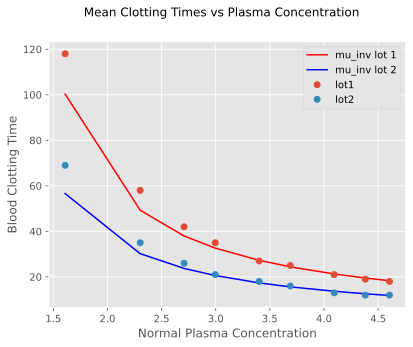

In [8]:
mlot1, = plt.plot(bc_data_X, mu_inv1, "r", label="mu_inv lot 1")
mlot2, = plt.plot(bc_data_X, mu_inv2, "b", label="mu_inv lot 2")
l1, = plt.plot(bc_data_X, bc_data_lot1, "o", label="lot1")
l2, = plt.plot(bc_data_X, bc_data_lot2, "o", label="lot2")

plt.suptitle("Mean Clotting Times vs Plasma Concentration")
plt.xlabel('Normal Plasma Concentration')
plt.ylabel('Blood Clotting Time')

plt.legend(handles=[mlot1, mlot2, l1, l2])

As this package is a wrapper around CmdStanPy, we can gather additional statistics about the fitted model with methods from that package. In particular, we can consider further statistics about the model by using CmdStanPy's summary method on the results of the fit. 

Notice that $\mu$ ("mu") and the link-inverted $\mu$ ("mu unlinked") are included as part of the model summary. 

In [9]:
glm_gamma1.fitted_samples_.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-37.790700,0.048397,1.420480,-40.559000,-37.410400,-36.307800,861.4500,3214.37000,1.00188
alpha[1],-0.014009,0.000361,0.010592,-0.029066,-0.015038,0.004532,862.3550,3217.74000,1.00390
beta[1],0.014901,0.000147,0.004481,0.007606,0.014942,0.022047,934.1880,3485.78000,1.00281
sigma,4.648400,0.056960,2.041920,1.903710,4.355220,8.396990,1285.2623,4795.75485,1.00157


In [10]:
glm_gamma2.fitted_samples_.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-33.573100,0.045616,1.433710,-36.376200,-33.185600,-32.051900,987.83200,3553.3500,1.01210
alpha[1],-0.018211,0.000587,0.017596,-0.042472,-0.019850,0.012094,898.71800,3232.8000,1.00918
beta[1],0.022297,0.000229,0.007133,0.011064,0.022455,0.033127,972.99500,3499.9800,1.00612
sigma,4.709050,0.065350,2.140280,1.878050,4.409540,8.717830,1072.54535,3858.0768,1.00596


Additional information about the model and various visualizations can be revealed by Arviz, which seamlessly integrates with CmdStanPy components. Consider the following.  

In [11]:
import arviz as az
az.style.use("arviz-darkgrid")

In [12]:
infdata = az.from_cmdstanpy(glm_gamma1.fitted_samples_)
infdata

Inference data with groups:
	> posterior
	> sample_stats

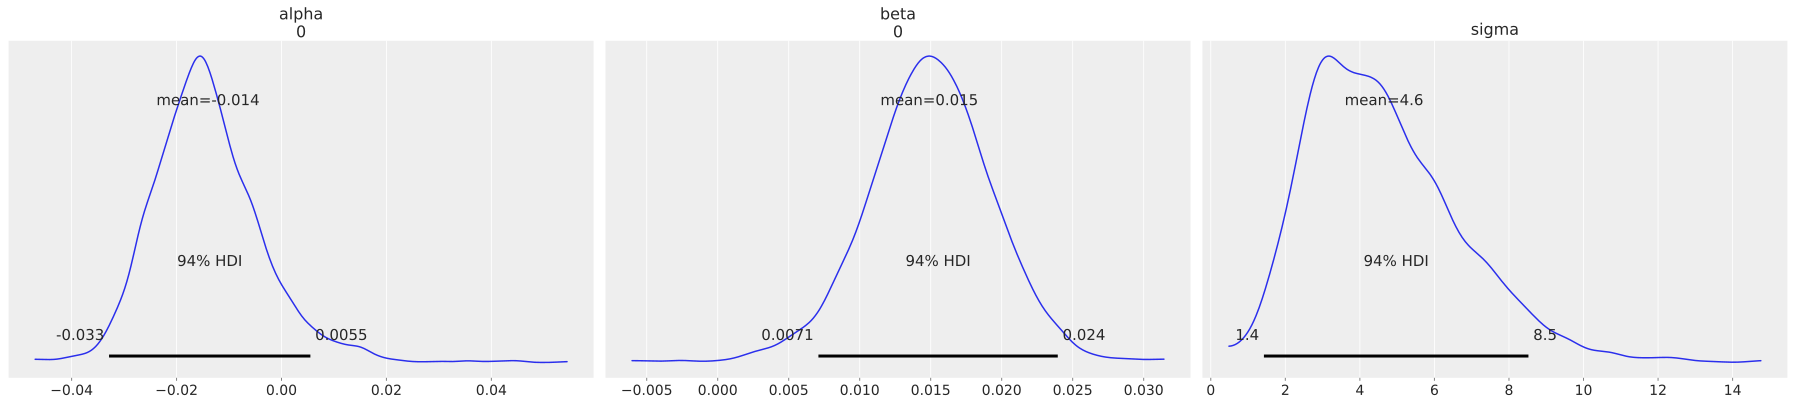

In [13]:
az.plot_posterior(infdata, var_names=['alpha', 'beta', 'sigma']);

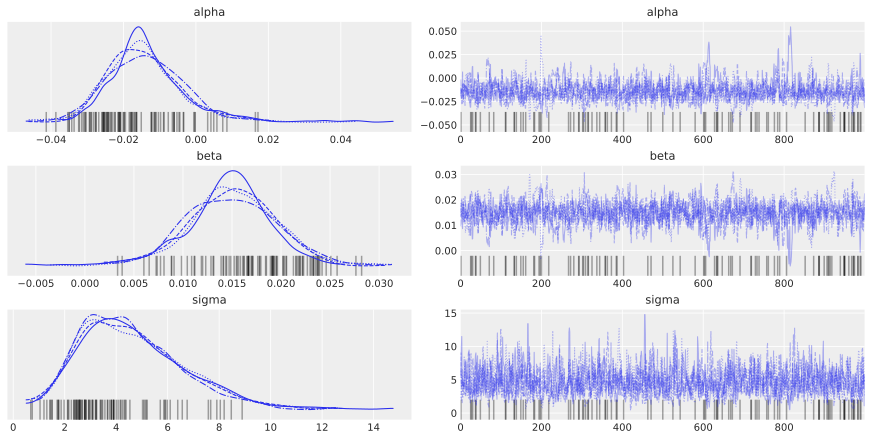

In [14]:
az.plot_trace(infdata, var_names=['alpha', 'beta', 'sigma'], compact=True);